# Model test
***
Test DenseNet 

In [2]:
# Libraries

import os
from PIL import Image
import itertools

import cv2
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

print('Modules Successfully Loaded')


Modules Successfully Loaded


## Dataframe to split train and test and validation

In [3]:
data_dir= "./Multi-class Weather Dataset"
paths = []
labels = []
folds = os.listdir(data_dir)
for fold in folds :
    condition_path = data_dir +"/" + fold
    all_pic = os.listdir(condition_path)
    for each_pic in all_pic:
        each_pic_path = condition_path +"/" + each_pic
        paths.append(each_pic_path)
        labels.append(fold)
        
pseries = pd.Series(paths, name='Picture Path')
lseries = pd.Series(labels, name='Label')

df = pd.concat([pseries, lseries], axis =1)
df.head()

,Picture Path,Label
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Cloudy
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Cloudy
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Cloudy
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Cloudy
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Cloudy


In [15]:
import os
from PIL import Image

# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        resolution = None
    return width, height , resolution

# Add columns to dataframe
df['width'], df['height'], df['resolution'] = zip(*df['Picture Path'].map(get_image_dimensions))

df.head()


,Picture Path,Label,width,height,resolution
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Cloudy,600,400,None
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Cloudy,271,186,None
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Cloudy,259,194,None
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Cloudy,338,149,None
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Cloudy,800,377,None


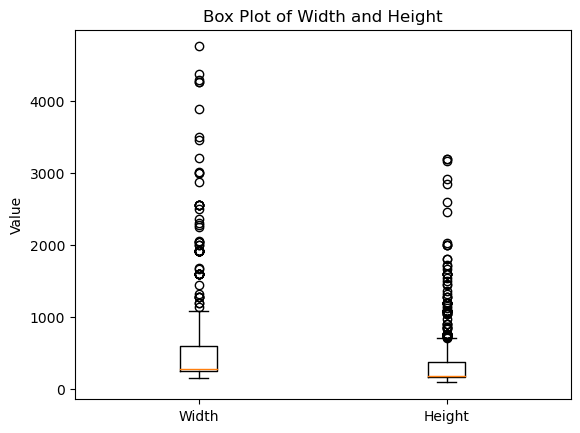

Width:
Minimum: 158
Maximum: 4752
Median: 284.0
First Quartile: 259.0
Third Quartile: 600.0
Height:
Minimum: 94
Maximum: 3195
Median: 183.0
First Quartile: 168.0
Third Quartile: 384.0


In [16]:
import matplotlib.pyplot as plt

min_width = df['width'].min()
max_width = df['width'].max()
median_width = df['width'].median()
q1_width = df['width'].quantile(0.25)
q3_width = df['width'].quantile(0.75)

min_height = df['height'].min()
max_height = df['height'].max()
median_height = df['height'].median()
q1_height = df['height'].quantile(0.25)
q3_height = df['height'].quantile(0.75)

plt.boxplot([df['width'], df['height']], labels=['Width', 'Height'])
plt.title('Box Plot of Width and Height')
plt.ylabel('Value')
plt.show()

# Print the statistics
print('Width:')
print('Minimum:', min_width)
print('Maximum:', max_width)
print('Median:', median_width)
print('First Quartile:', q1_width)
print('Third Quartile:', q3_width)

print('Height:')
print('Minimum:', min_height)
print('Maximum:', max_height)
print('Median:', median_height)
print('First Quartile:', q1_height)
print('Third Quartile:', q3_height)


## Train test val 

In [5]:
train_set, t_v_set = train_test_split(df, test_size=0.2, shuffle=True, stratify=df["Label"], random_state=42)
test_set, val_set = train_test_split(t_v_set, test_size=0.5, shuffle=True, stratify=t_v_set["Label"], random_state=42)

In [6]:
train_set.head()

,Picture Path,Label,width,height,resolution
296,./Multi-class Weather Dataset/Cloudy/cloudy96.jpg,Cloudy,299,168,None
413,./Multi-class Weather Dataset/Rain/rain200.jpg,Rain,612,405,None
605,./Multi-class Weather Dataset/Shine/shine180.jpg,Shine,244,183,"(96, 96)"
292,./Multi-class Weather Dataset/Cloudy/cloudy92.jpg,Cloudy,299,168,None
555,./Multi-class Weather Dataset/Shine/shine135.jpg,Shine,238,212,None


In [7]:
test_set.head()

,Picture Path,Label,width,height,resolution
273,./Multi-class Weather Dataset/Cloudy/cloudy75.jpg,Cloudy,900,676,"(72, 72)"
715,./Multi-class Weather Dataset/Shine/shine51.jpg,Shine,284,177,None
710,./Multi-class Weather Dataset/Shine/shine47.jpg,Shine,299,168,None
959,./Multi-class Weather Dataset/Sunrise/sunrise2...,Sunrise,227,152,"(96, 96)"
615,./Multi-class Weather Dataset/Shine/shine19.jpg,Shine,286,176,None


In [8]:
val_set.sample(10)

,Picture Path,Label,width,height,resolution
704,./Multi-class Weather Dataset/Shine/shine41.jpg,Shine,299,168,None
927,./Multi-class Weather Dataset/Sunrise/sunrise2...,Sunrise,233,161,"(96, 96)"
1040,./Multi-class Weather Dataset/Sunrise/sunrise3...,Sunrise,228,166,"(96, 96)"
628,./Multi-class Weather Dataset/Shine/shine200.jpg,Shine,228,171,"(96, 96)"
1007,./Multi-class Weather Dataset/Sunrise/sunrise3...,Sunrise,333,187,"(96, 96)"
801,./Multi-class Weather Dataset/Sunrise/sunrise1...,Sunrise,259,194,None
21,./Multi-class Weather Dataset/Cloudy/cloudy118...,Cloudy,259,194,None
544,./Multi-class Weather Dataset/Shine/shine125.jpg,Shine,1024,768,"(300, 300)"
820,./Multi-class Weather Dataset/Sunrise/sunrise1...,Sunrise,284,177,None
1080,./Multi-class Weather Dataset/Sunrise/sunrise5...,Sunrise,1024,768,None


## Image Data generator 

In [9]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

print("Train Set:")
train_gen = tr_gen.flow_from_dataframe(train_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)


print("Val Set:")
valid_gen = ts_gen.flow_from_dataframe(val_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)


print("Test Set:")
test_gen = ts_gen.flow_from_dataframe(test_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=False, batch_size=batch_size)


Train Set:
Found 900 validated image filenames belonging to 4 classes.
Val Set:
Found 113 validated image filenames belonging to 4 classes.
Test Set:
Found 112 validated image filenames belonging to 4 classes.


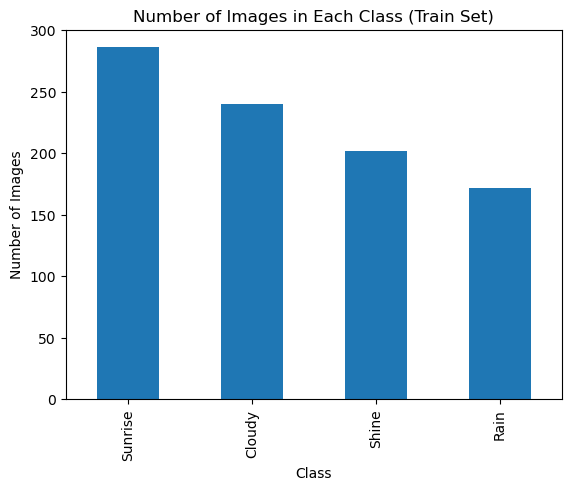

In [10]:

class_counts = train_set['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Train Set)')
plt.show() 


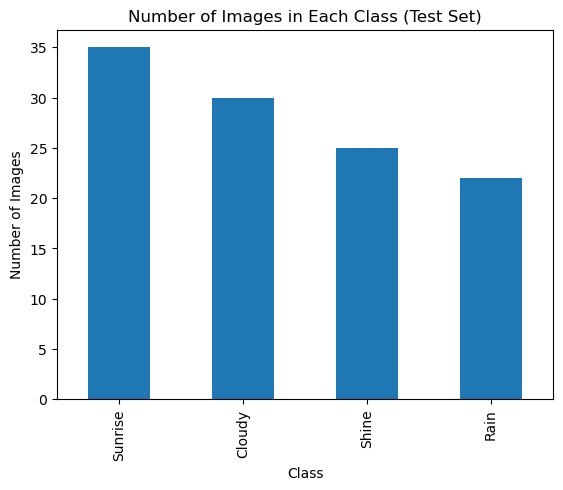

In [11]:
class_counts = test_set['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Test Set)')
plt.show()

## Visualize data

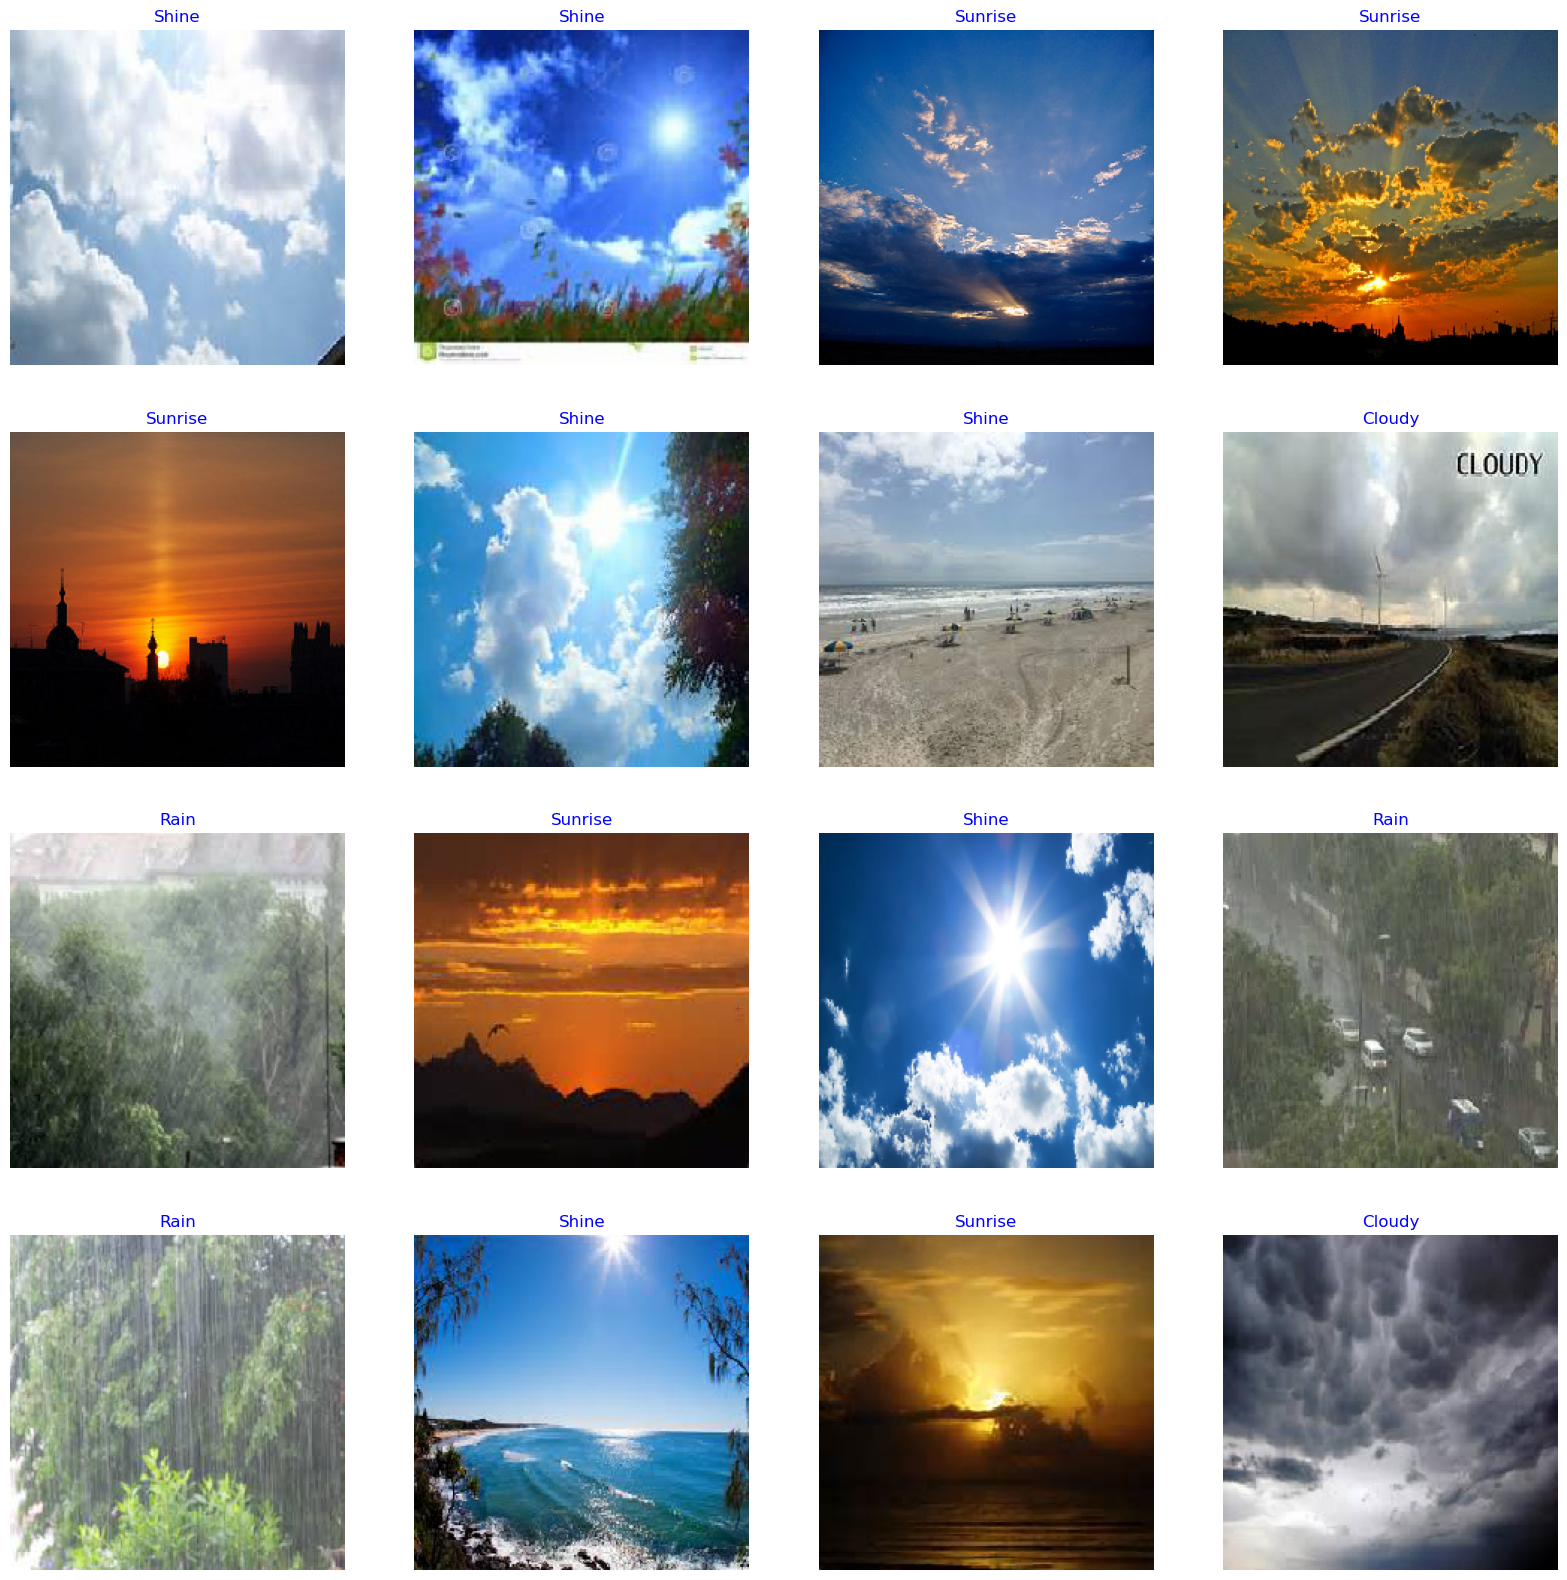

In [12]:
g_dict = train_gen.class_indices  
classes = list(g_dict.keys())    
images, labels = next(train_gen)     
plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# Model 